### Paper Figures 

The following workbook shows the creation of the figures for the paper: 'Extracting features from satelleite imagery to understand the size and scale of housing sub-markets in Madrid'.

In [54]:
import pandas as pd
import geopandas as gpd
import os
from shapely.geometry import Point
from shapely import wkt
import statsmodels
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx

In [63]:
# Read in internal validation scores
scores = pd.read_csv('scores_cluster2.csv')
external =  pd.read_csv('housing_scores2.csv')

In [56]:
# Subset data into different cluster numbers
scores_3 = scores[scores['num_clus']==3]
scores_10 = scores[scores['num_clus']==10]
scores_18 = scores[scores['num_clus']==18]
scores_25 = scores[scores['num_clus']==25]


### Scatterplots

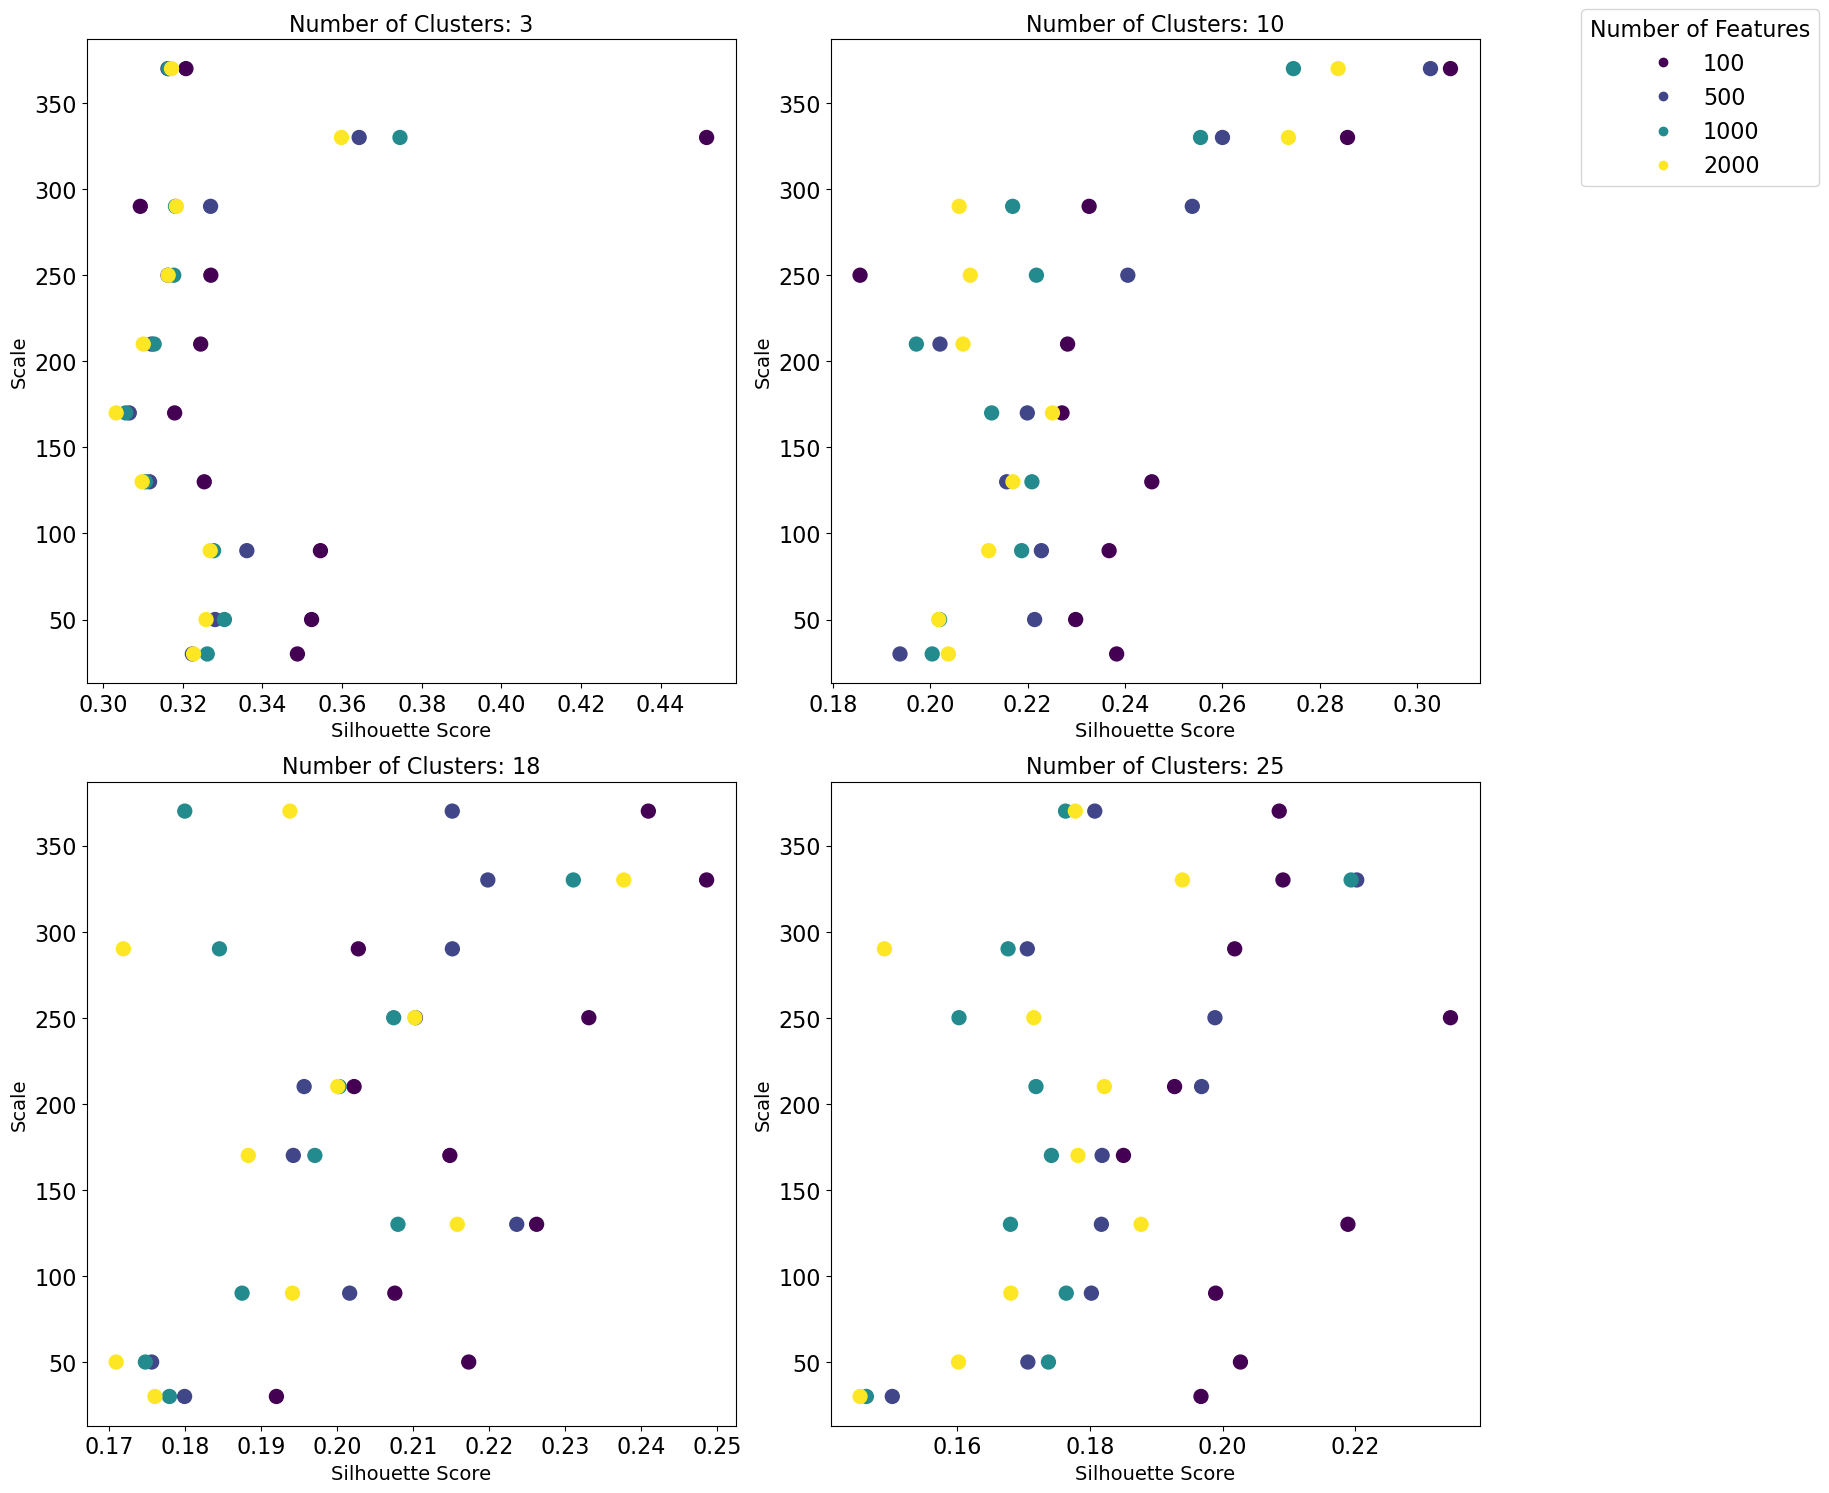

In [57]:
#Plot Silhouette score
# Define unique cluster sizes and number of features
cluster_sizes = scores['num_clus'].unique()
num_features = scores['num_feats'].unique()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Flatten axs to easily iterate over them
axs = axs.flatten()

# Collect legend handles and labels
legend_labels = []

# Loop through each cluster size and plot
for i, size in enumerate(cluster_sizes):
    # Filter data for the current cluster size
    subset_df = scores[scores['num_clus'] == size]
    
    # Scatter plot with hue
    scatter = axs[i].scatter(subset_df['sil_score'], subset_df['scale'], c=subset_df['num_feats'], s=100, label=f'{size} Clusters')
    
    # Add labels for legend
    legend_labels.append(f'{size} Clusters')

    # Labeling the axes
    axs[i].set_xlabel('Silhouette Score',fontsize=14)
    axs[i].set_ylabel('Scale', fontsize=14)
    axs[i].tick_params(axis='both', which='major', labelsize=16) 
    axs[i].set_title(f'Number of Clusters: {size}', fontsize=16)
    
# Add a single legend for all subplots outside of the plot
#fig.legend(scatter.legend_elements()[0], num_features, loc='upper left', bbox_to_anchor=(1.05, 1), title='Number of Features')
legend = fig.legend(scatter.legend_elements()[0], num_features, loc='upper left', bbox_to_anchor=(1.05, 1), title='Number of Features', fontsize=16)  # Adjust fontsize as needed
plt.setp(legend.get_title(), fontsize=16)
# Adjust layout
plt.tight_layout()

#plt.savefig('sil_score_clus.png')

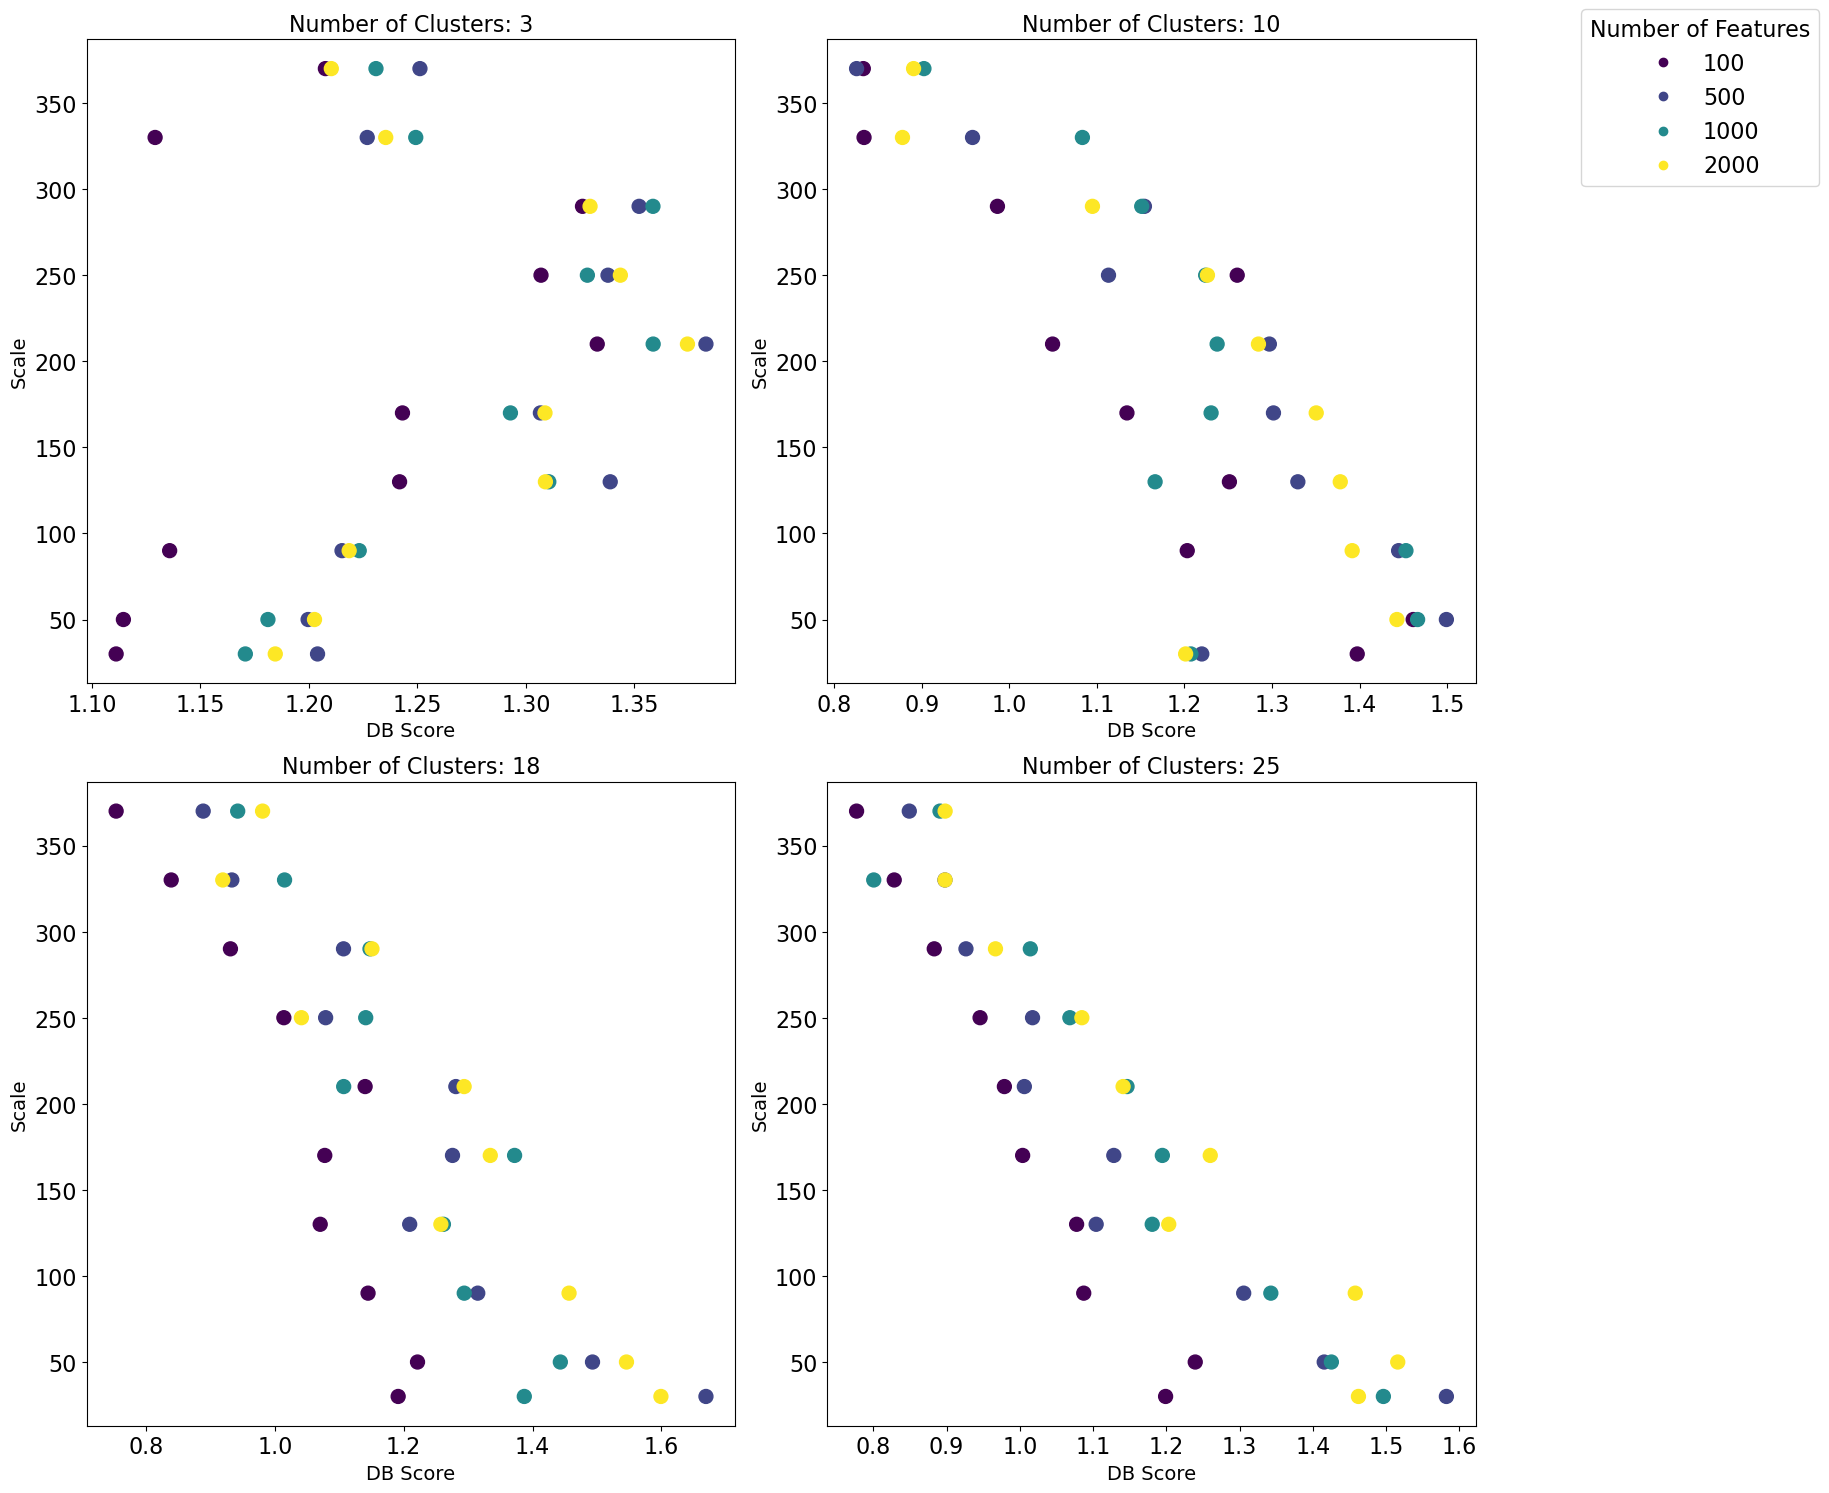

In [58]:
#Plot DB score
# Define unique cluster sizes and number of features
cluster_sizes = scores['num_clus'].unique()
num_features = scores['num_feats'].unique()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Flatten axs to easily iterate over them
axs = axs.flatten()

# Collect legend handles and labels
legend_labels = []

# Loop through each cluster size and plot
for i, size in enumerate(cluster_sizes):
    # Filter data for the current cluster size
    subset_df = scores[scores['num_clus'] == size]
    
    # Scatter plot with hue
    scatter = axs[i].scatter(subset_df['db_score'], subset_df['scale'], c=subset_df['num_feats'], s=100, label=f'{size} Clusters')
    
    # Add labels for legend
    legend_labels.append(f'{size} Clusters')

    # Labeling the axes
    axs[i].set_xlabel('DB Score',fontsize=14)
    axs[i].set_ylabel('Scale', fontsize=14)
    axs[i].tick_params(axis='both', which='major', labelsize=16) 
    axs[i].set_title(f'Number of Clusters: {size}', fontsize=16)
    
# Add a single legend for all subplots outside of the plot
#fig.legend(scatter.legend_elements()[0], num_features, loc='upper left', bbox_to_anchor=(1.05, 1), title='Number of Features')
legend = fig.legend(scatter.legend_elements()[0], num_features, loc='upper left', bbox_to_anchor=(1.05, 1), title='Number of Features', fontsize=16)  # Adjust fontsize as needed
plt.setp(legend.get_title(), fontsize=16)
# Adjust layout
plt.tight_layout()

#plt.savefig('db_score_clus.png')

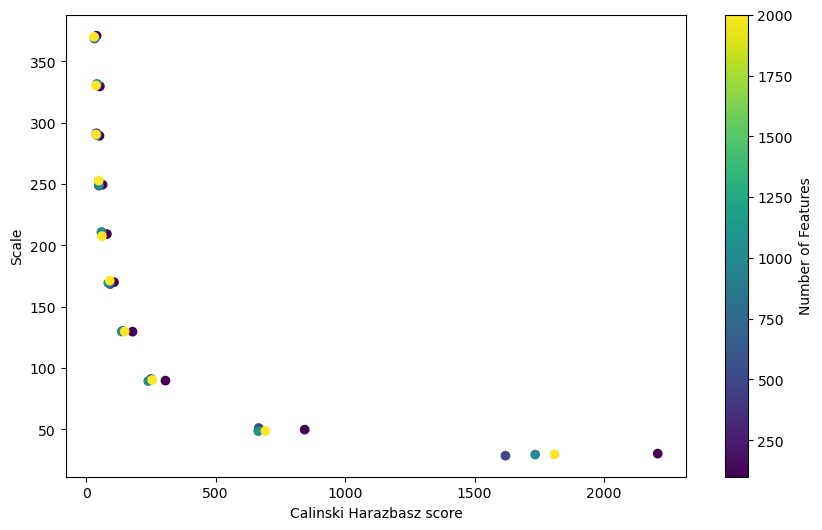

In [60]:
# PLot CH score
# Define the data
db = scores_25['cal_score']
scale = scores_25['scale']
feats = scores_25['num_feats']

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Define the amount of jitter
jitter_amount = 1

# Add random noise to x and y coordinates
db_jittered = db + np.random.normal(0, jitter_amount, size=len(db))
scale_jittered = scale + np.random.normal(0, jitter_amount, size=len(scale))

# Plot the scatter plot with jittered points colored based on 'feats' using the Viridis colormap
plt.scatter(db_jittered, scale_jittered, c=feats, cmap='viridis')

# Additional plot configurations (labels, titles, etc.)
plt.xlabel('Calinski Harazbasz score')
plt.ylabel('Scale')
#plt.title('Calinski Harazbasz score vs Scale for each scale using 18 Clusters')

# Adding color bar
plt.colorbar(label='Number of Features')

# Show plot
plt.savefig('ch_score_colour_blind_friendly.png')

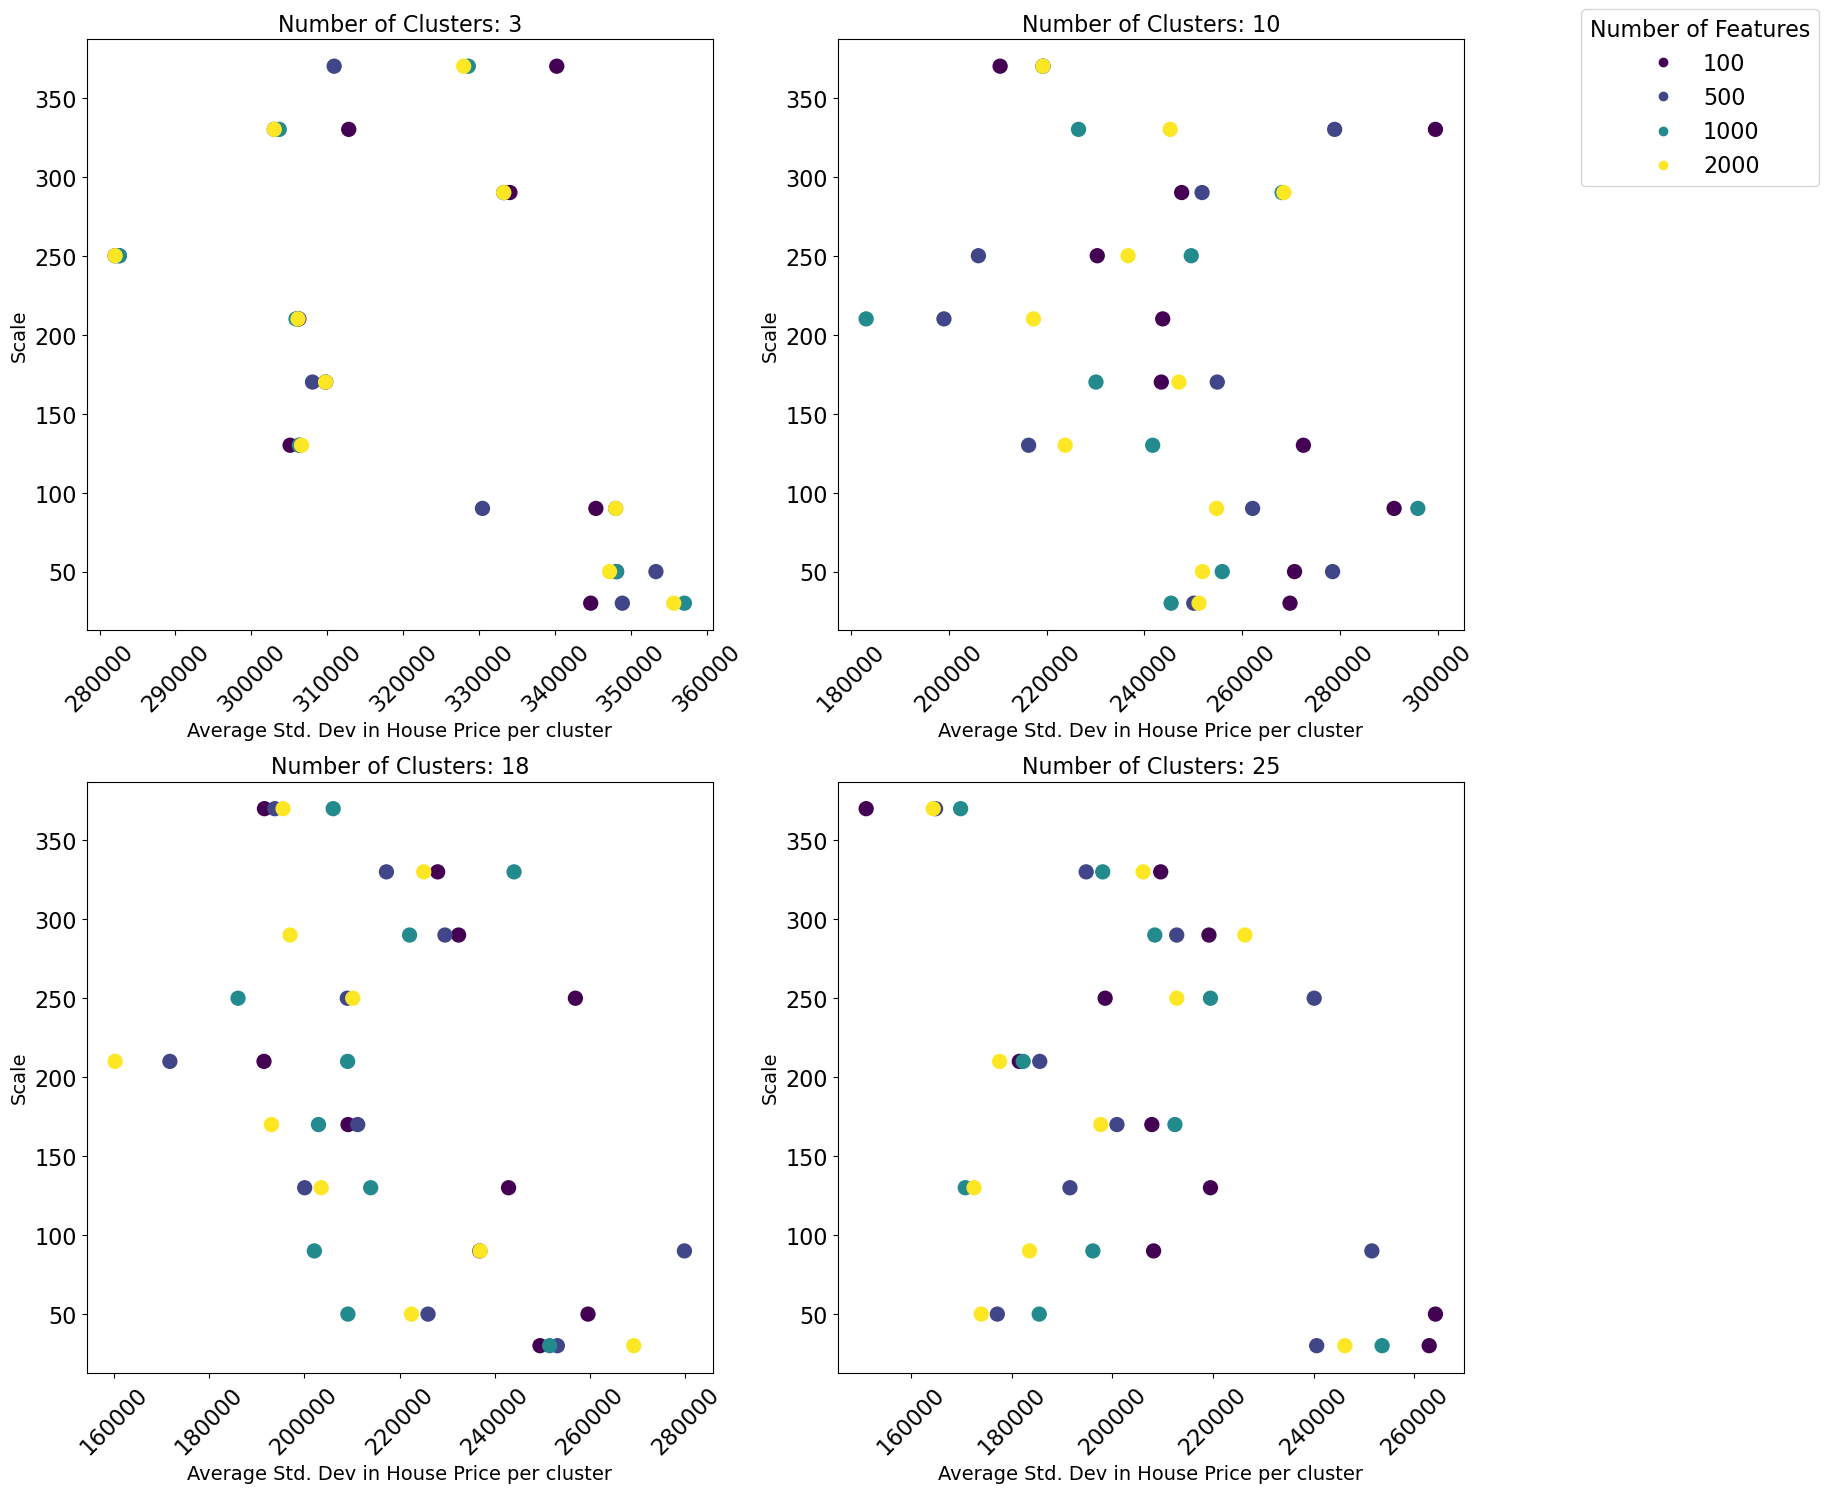

In [64]:
# Plot average within cluster housing price across scales
# Define unique cluster sizes and number of features

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Flatten axs to easily iterate over them
axs = axs.flatten()

# Collect legend handles and labels
legend_labels = []

# Loop through each cluster size and plot
for i, size in enumerate(cluster_sizes):
    # Filter data for the current cluster size
    subset_df = external[external['num_clus'] == size]
    
    # Scatter plot with hue
    scatter = axs[i].scatter(subset_df['std_price_divided'], subset_df['scale'], c=subset_df['num_feats'], s=100, label=f'{size} Clusters')
    
    # Add labels for legend
    legend_labels.append(f'{size} Clusters')

    # Labeling the axes
    axs[i].set_xlabel('Average Std. Dev in House Price per cluster',fontsize=14)
    axs[i].set_ylabel('Scale', fontsize=14)
    axs[i].tick_params(axis='both', which='major', labelsize=16) 
    axs[i].set_title(f'Number of Clusters: {size}', fontsize=16)
    
    # Rotate x-axis tick labels
    axs[i].tick_params(axis='x', labelrotation=45)  # Adjust rotation angle as needed
    
# Add a single legend for all subplots outside of the plot
legend = fig.legend(scatter.legend_elements()[0], num_features, loc='upper left', bbox_to_anchor=(1.05, 1), title='Number of Features', fontsize=16)  # Adjust fontsize as needed
plt.setp(legend.get_title(), fontsize=16)

# Adjust layout
plt.tight_layout()

# Show or save the plot
plt.savefig('housep_score_clus_averagepclus.png')


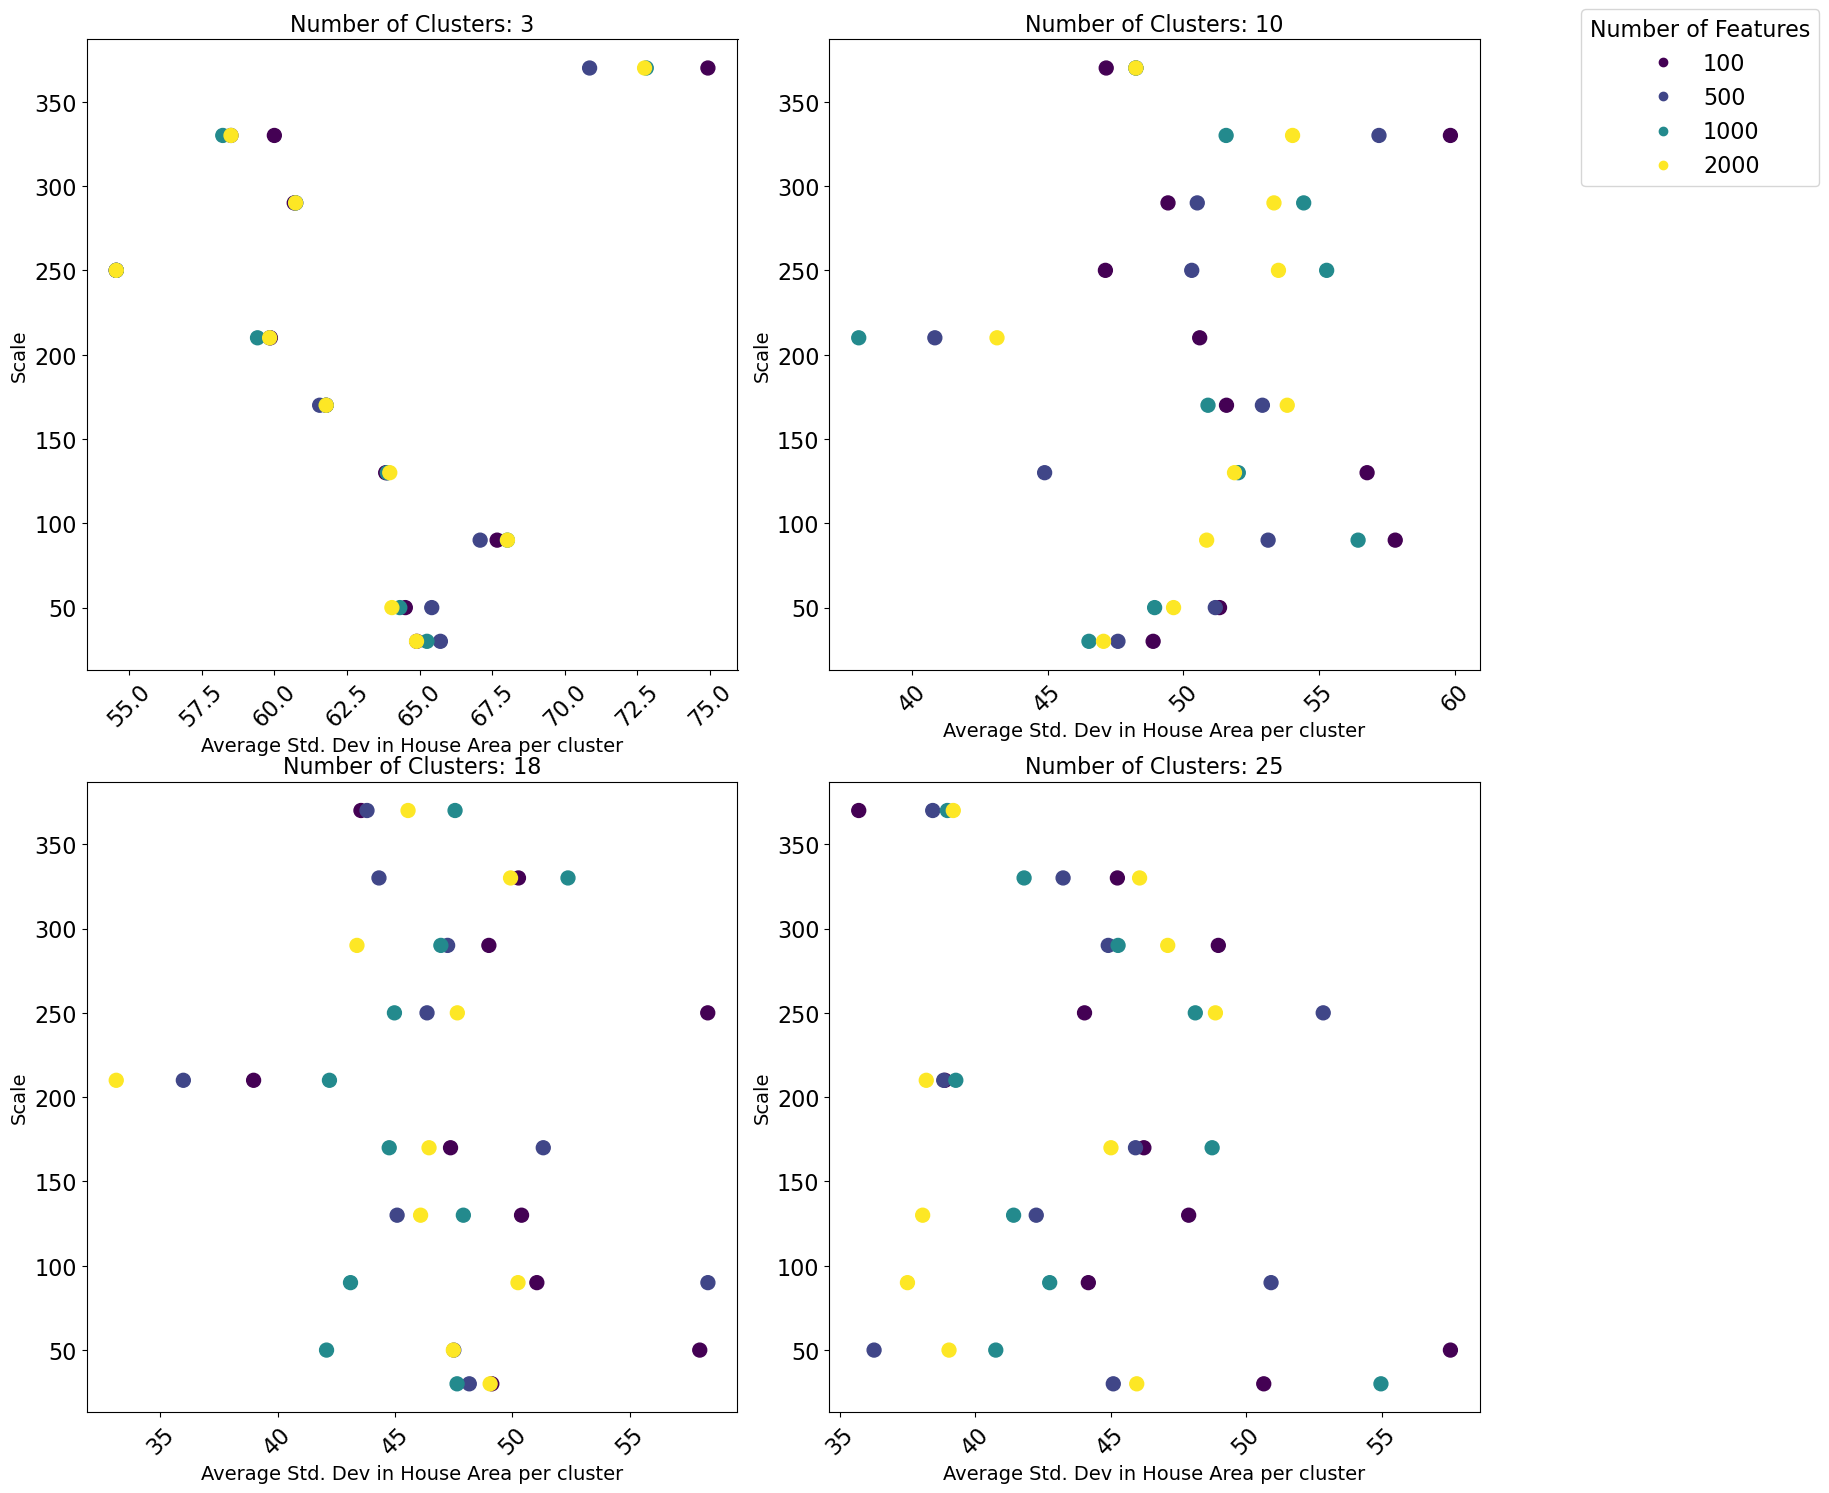

In [65]:
# Plot average within cluster housingarea across scales
# Define unique cluster sizes and number of features


# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Flatten axs to easily iterate over them
axs = axs.flatten()

# Collect legend handles and labels
legend_labels = []

# Loop through each cluster size and plot
for i, size in enumerate(cluster_sizes):
    # Filter data for the current cluster size
    subset_df = external[external['num_clus'] == size]
    
    # Scatter plot with hue
    scatter = axs[i].scatter(subset_df['std_area_divided'], subset_df['scale'], c=subset_df['num_feats'], s=100, label=f'{size} Clusters')
    
    # Add labels for legend
    legend_labels.append(f'{size} Clusters')

    # Labeling the axes
    axs[i].set_xlabel('Average Std. Dev in House Area per cluster',fontsize=14)
    axs[i].set_ylabel('Scale', fontsize=14)
    axs[i].tick_params(axis='both', which='major', labelsize=16) 
    axs[i].set_title(f'Number of Clusters: {size}', fontsize=16)
    
    # Rotate x-axis tick labels
    axs[i].tick_params(axis='x', labelrotation=45)  # Adjust rotation angle as needed
    
# Add a single legend for all subplots outside of the plot
legend = fig.legend(scatter.legend_elements()[0], num_features, loc='upper left', bbox_to_anchor=(1.05, 1), title='Number of Features', fontsize=16)  # Adjust fontsize as needed
plt.setp(legend.get_title(), fontsize=16)

# Adjust layout
plt.tight_layout()

# Show or save the plot
plt.savefig('area_score_clus_averagepclus.png')

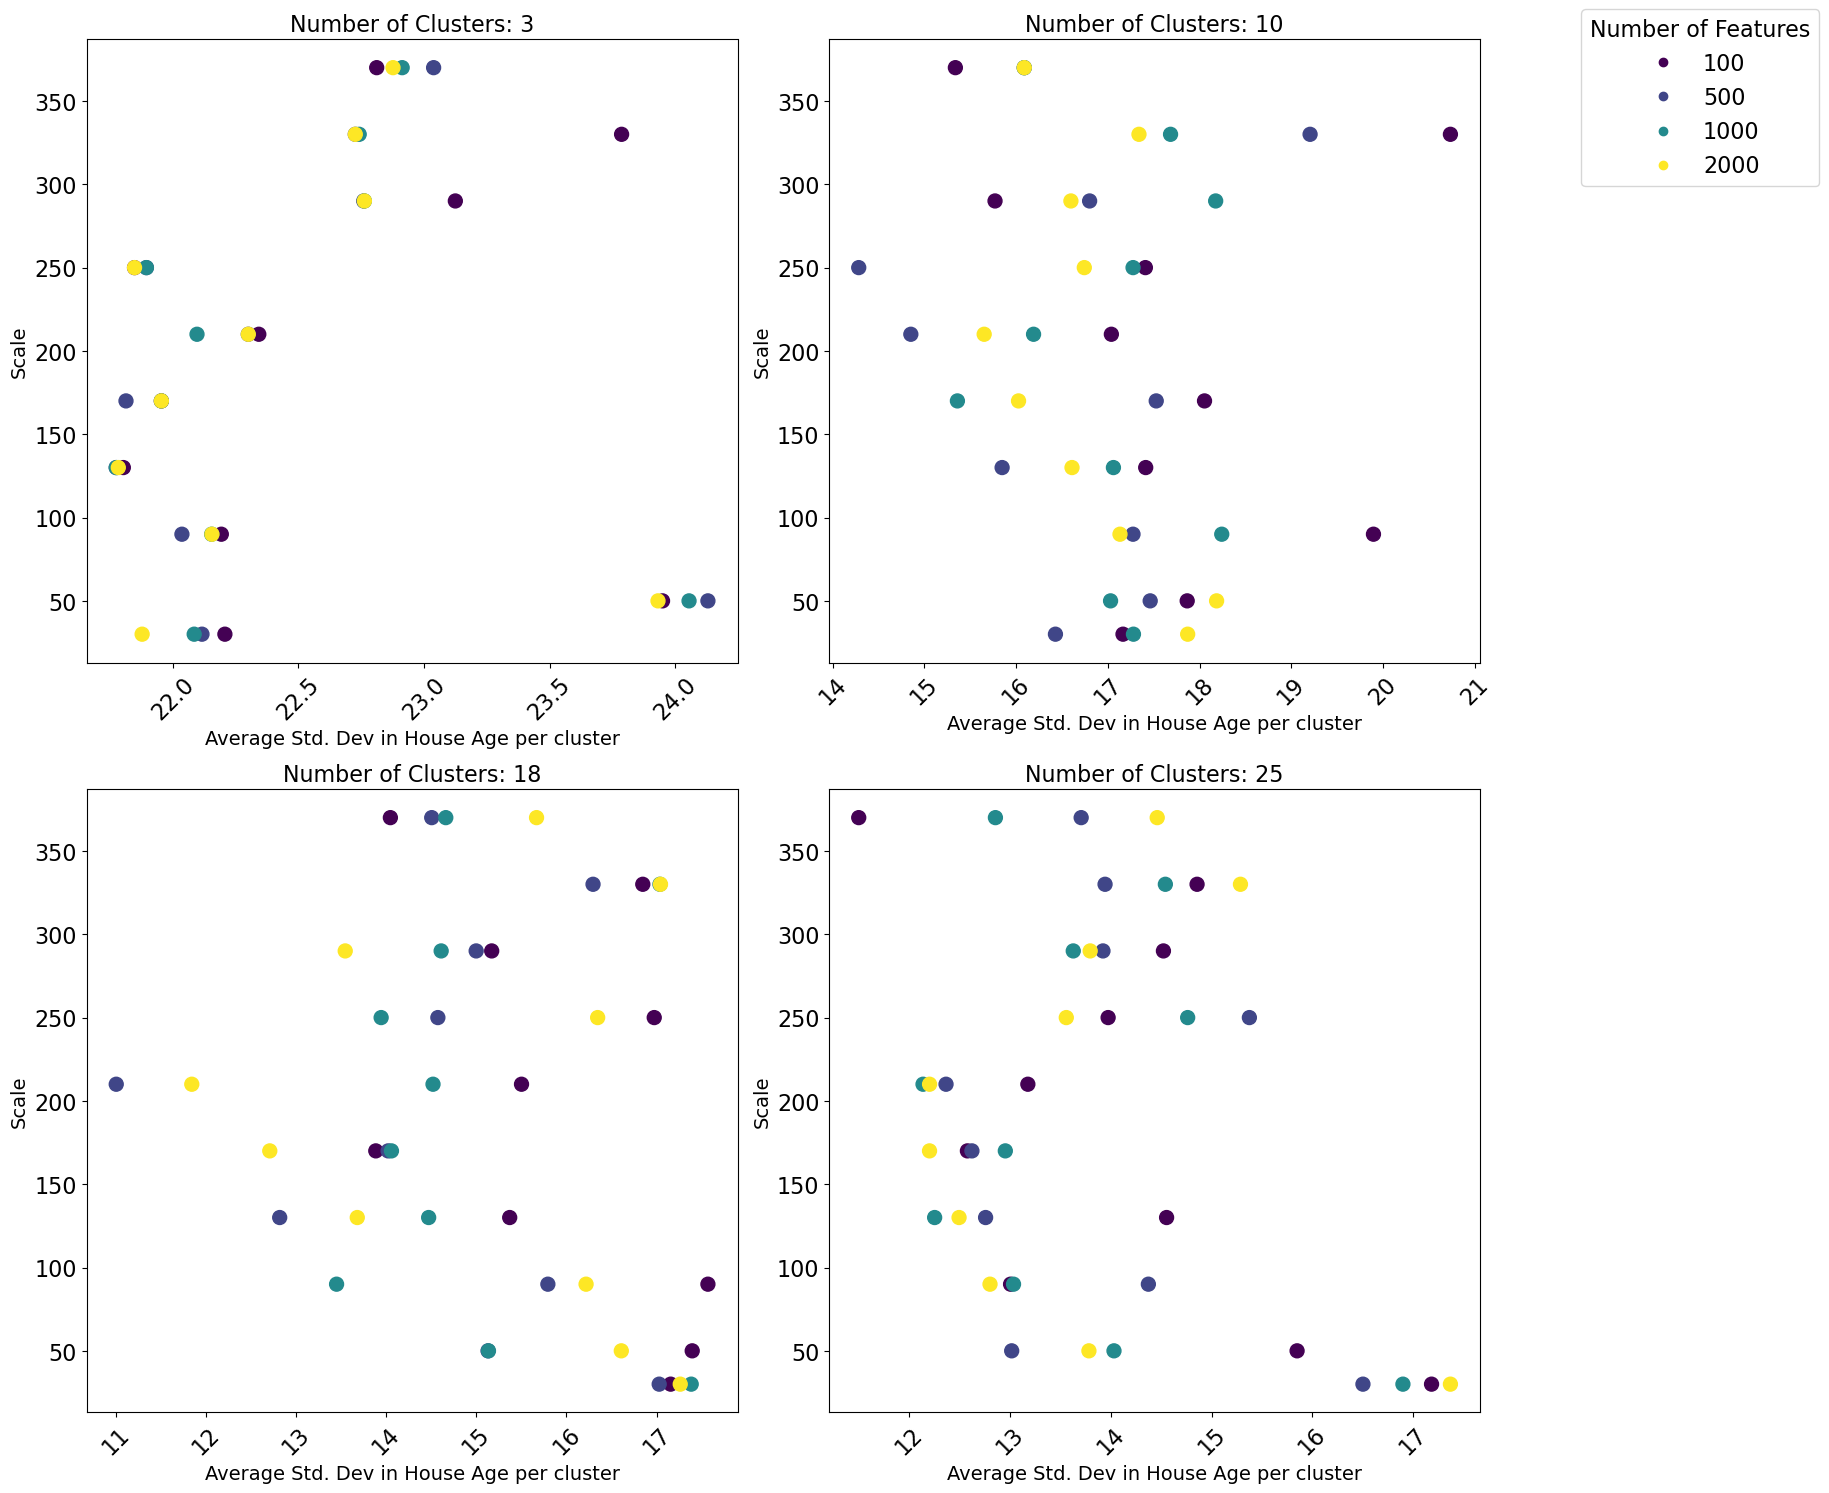

In [66]:
# Plot average within cluster housing age across scales
# Define unique cluster sizes and number of features


# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Flatten axs to easily iterate over them
axs = axs.flatten()

# Collect legend handles and labels
legend_labels = []

# Loop through each cluster size and plot
for i, size in enumerate(cluster_sizes):
    # Filter data for the current cluster size
    subset_df = external[external['num_clus'] == size]
    
    # Scatter plot with hue
    scatter = axs[i].scatter(subset_df['std_conyr_divided'], subset_df['scale'], c=subset_df['num_feats'], s=100, label=f'{size} Clusters')
    
    # Add labels for legend
    legend_labels.append(f'{size} Clusters')

    # Labeling the axes
    axs[i].set_xlabel('Average Std. Dev in House Age per cluster',fontsize=14)
    axs[i].set_ylabel('Scale', fontsize=14)
    axs[i].tick_params(axis='both', which='major', labelsize=16) 
    axs[i].set_title(f'Number of Clusters: {size}', fontsize=16)
    
    # Rotate x-axis tick labels
    axs[i].tick_params(axis='x', labelrotation=45)  # Adjust rotation angle as needed
    
# Add a single legend for all subplots outside of the plot
legend = fig.legend(scatter.legend_elements()[0], num_features, loc='upper left', bbox_to_anchor=(1.05, 1), title='Number of Features', fontsize=16)  # Adjust fontsize as needed
plt.setp(legend.get_title(), fontsize=16)

# Adjust layout
plt.tight_layout()

# Show or save the plot
plt.savefig('conyr_score_clus_averagepclus.png')

### Plot maps of clusters

In [46]:
# Load spatially joined data
# Directory where the spatially joined GeoDataFrames are saved
input_dir = "spatial_joined_data"

# List to store the loaded GeoDataFrames
loaded_dfs = []

# Iterate over each CSV file in the directory
for filename in os.listdir(input_dir):
    # Check if the file is a CSV file
    if filename.endswith(".csv"):
        # Construct the full path to the file
        file_path = os.path.join(input_dir, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list of loaded GeoDataFrames
        loaded_dfs.append(df)


In [47]:

from shapely.wkt import loads
# List to store the GeoDataFrames with converted geometries
converted_dfs = []

# Loop over each GeoDataFrame
for df in loaded_dfs:
    # Convert WKT geometries to Shapely geometry objects
    df['geometry'] = df['geometry'].apply(loads)
    
    # Create a new GeoDataFrame with the converted geometries
    converted_df = gpd.GeoDataFrame(df, geometry='geometry', crs=4326)
    
    # Append the new GeoDataFrame to the list
    converted_dfs.append(converted_df)




In [48]:
# List to store the converted and transformed GeoDataFrames
transformed_dfs = []

# Loop over each DataFrame
for df in converted_dfs:
    # Change the CRS
    gdf = df.to_crs('EPSG:25830')  # Change to the desired CRS
    
    # Append the transformed GeoDataFrame to the list
    transformed_dfs.append(gdf)

# Now, transformed_dfs contains all the GeoDataFrames with the desired CRS


In [49]:
# Read in shapefile of Madrid with district boundaries
db = gpd.read_file('Distritos.shp')
# Set local crs in m 
db = db.to_crs(25830)

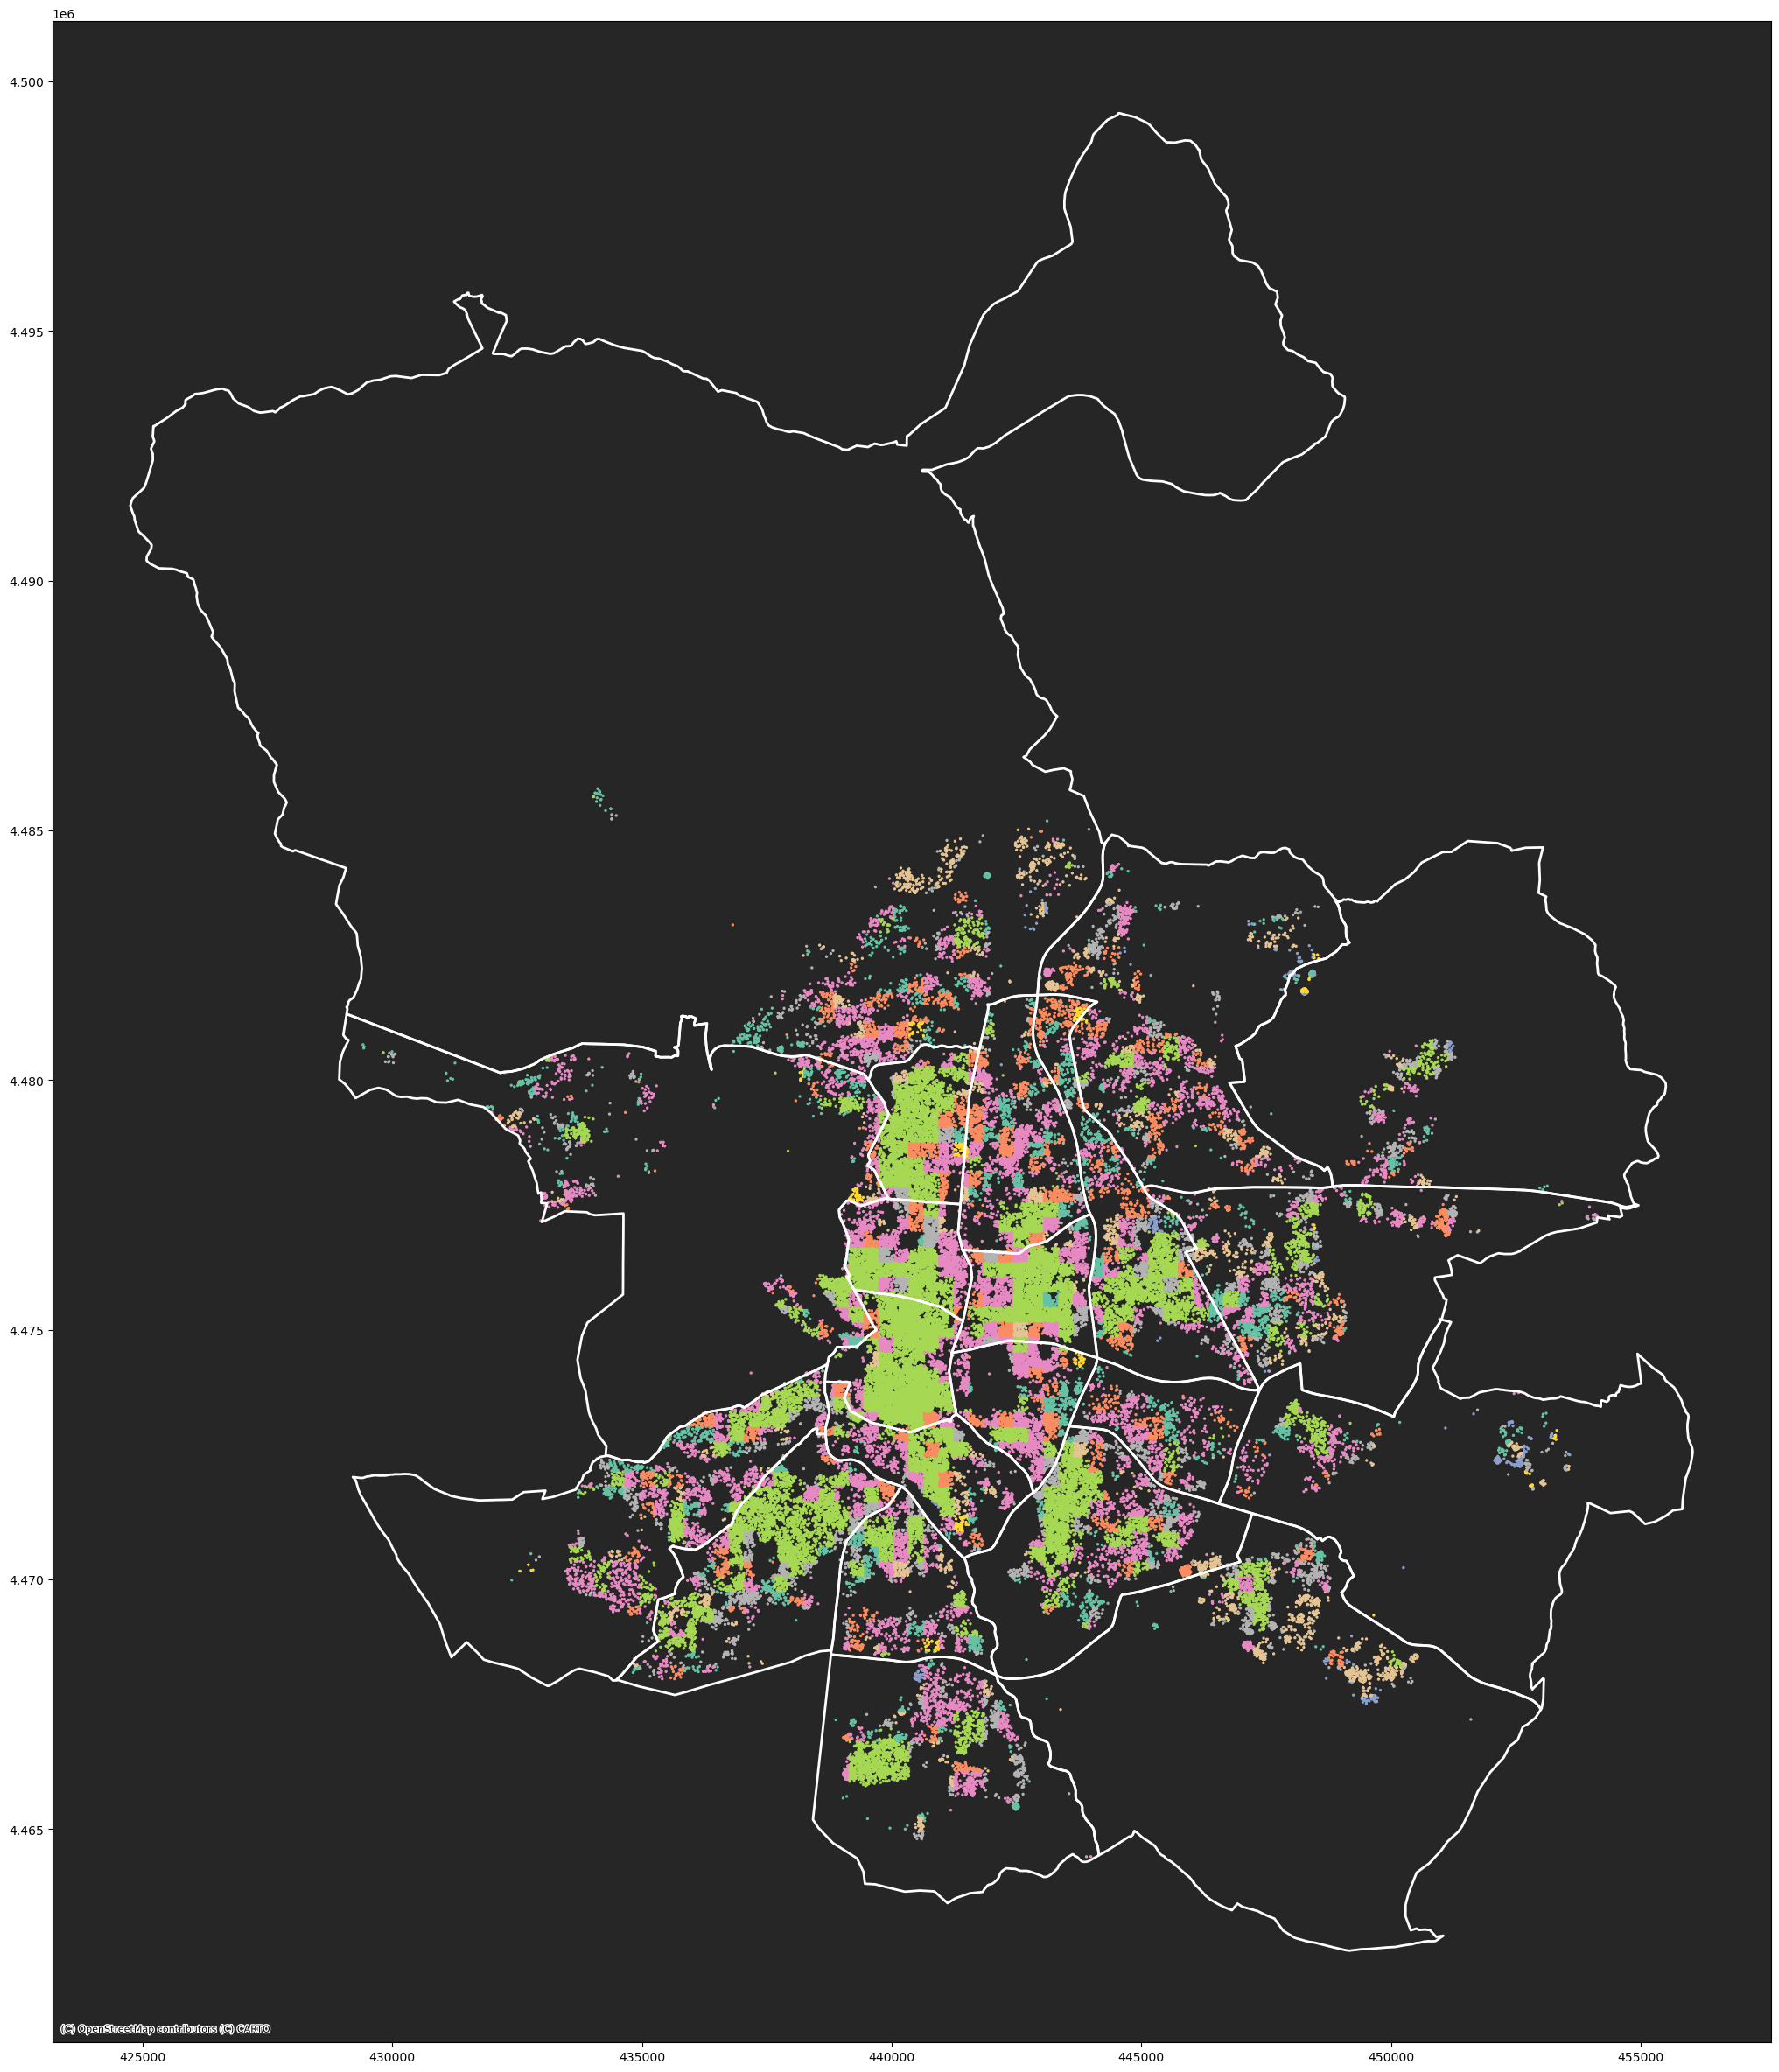

In [51]:
f, axs = plt.subplots(figsize=(30, 30))  # Fix: Pass a tuple to `figsize` parameter

# Assuming new_dfs_list is a list of GeoDataFrames
transformed_dfs[0].plot('100_25',ax=axs, s=2, cmap='Set2')  # Fix: Access the Axes object using indexing
db.plot(ax=axs, facecolor='none', edgecolor='white', linewidth=2)
# Add basemap
ctx.add_basemap(ax=axs, zoom=10, source=ctx.providers.CartoDB.DarkMatter)
#plt.savefig('map_clus_25_scale0_final.png', dpi=500)

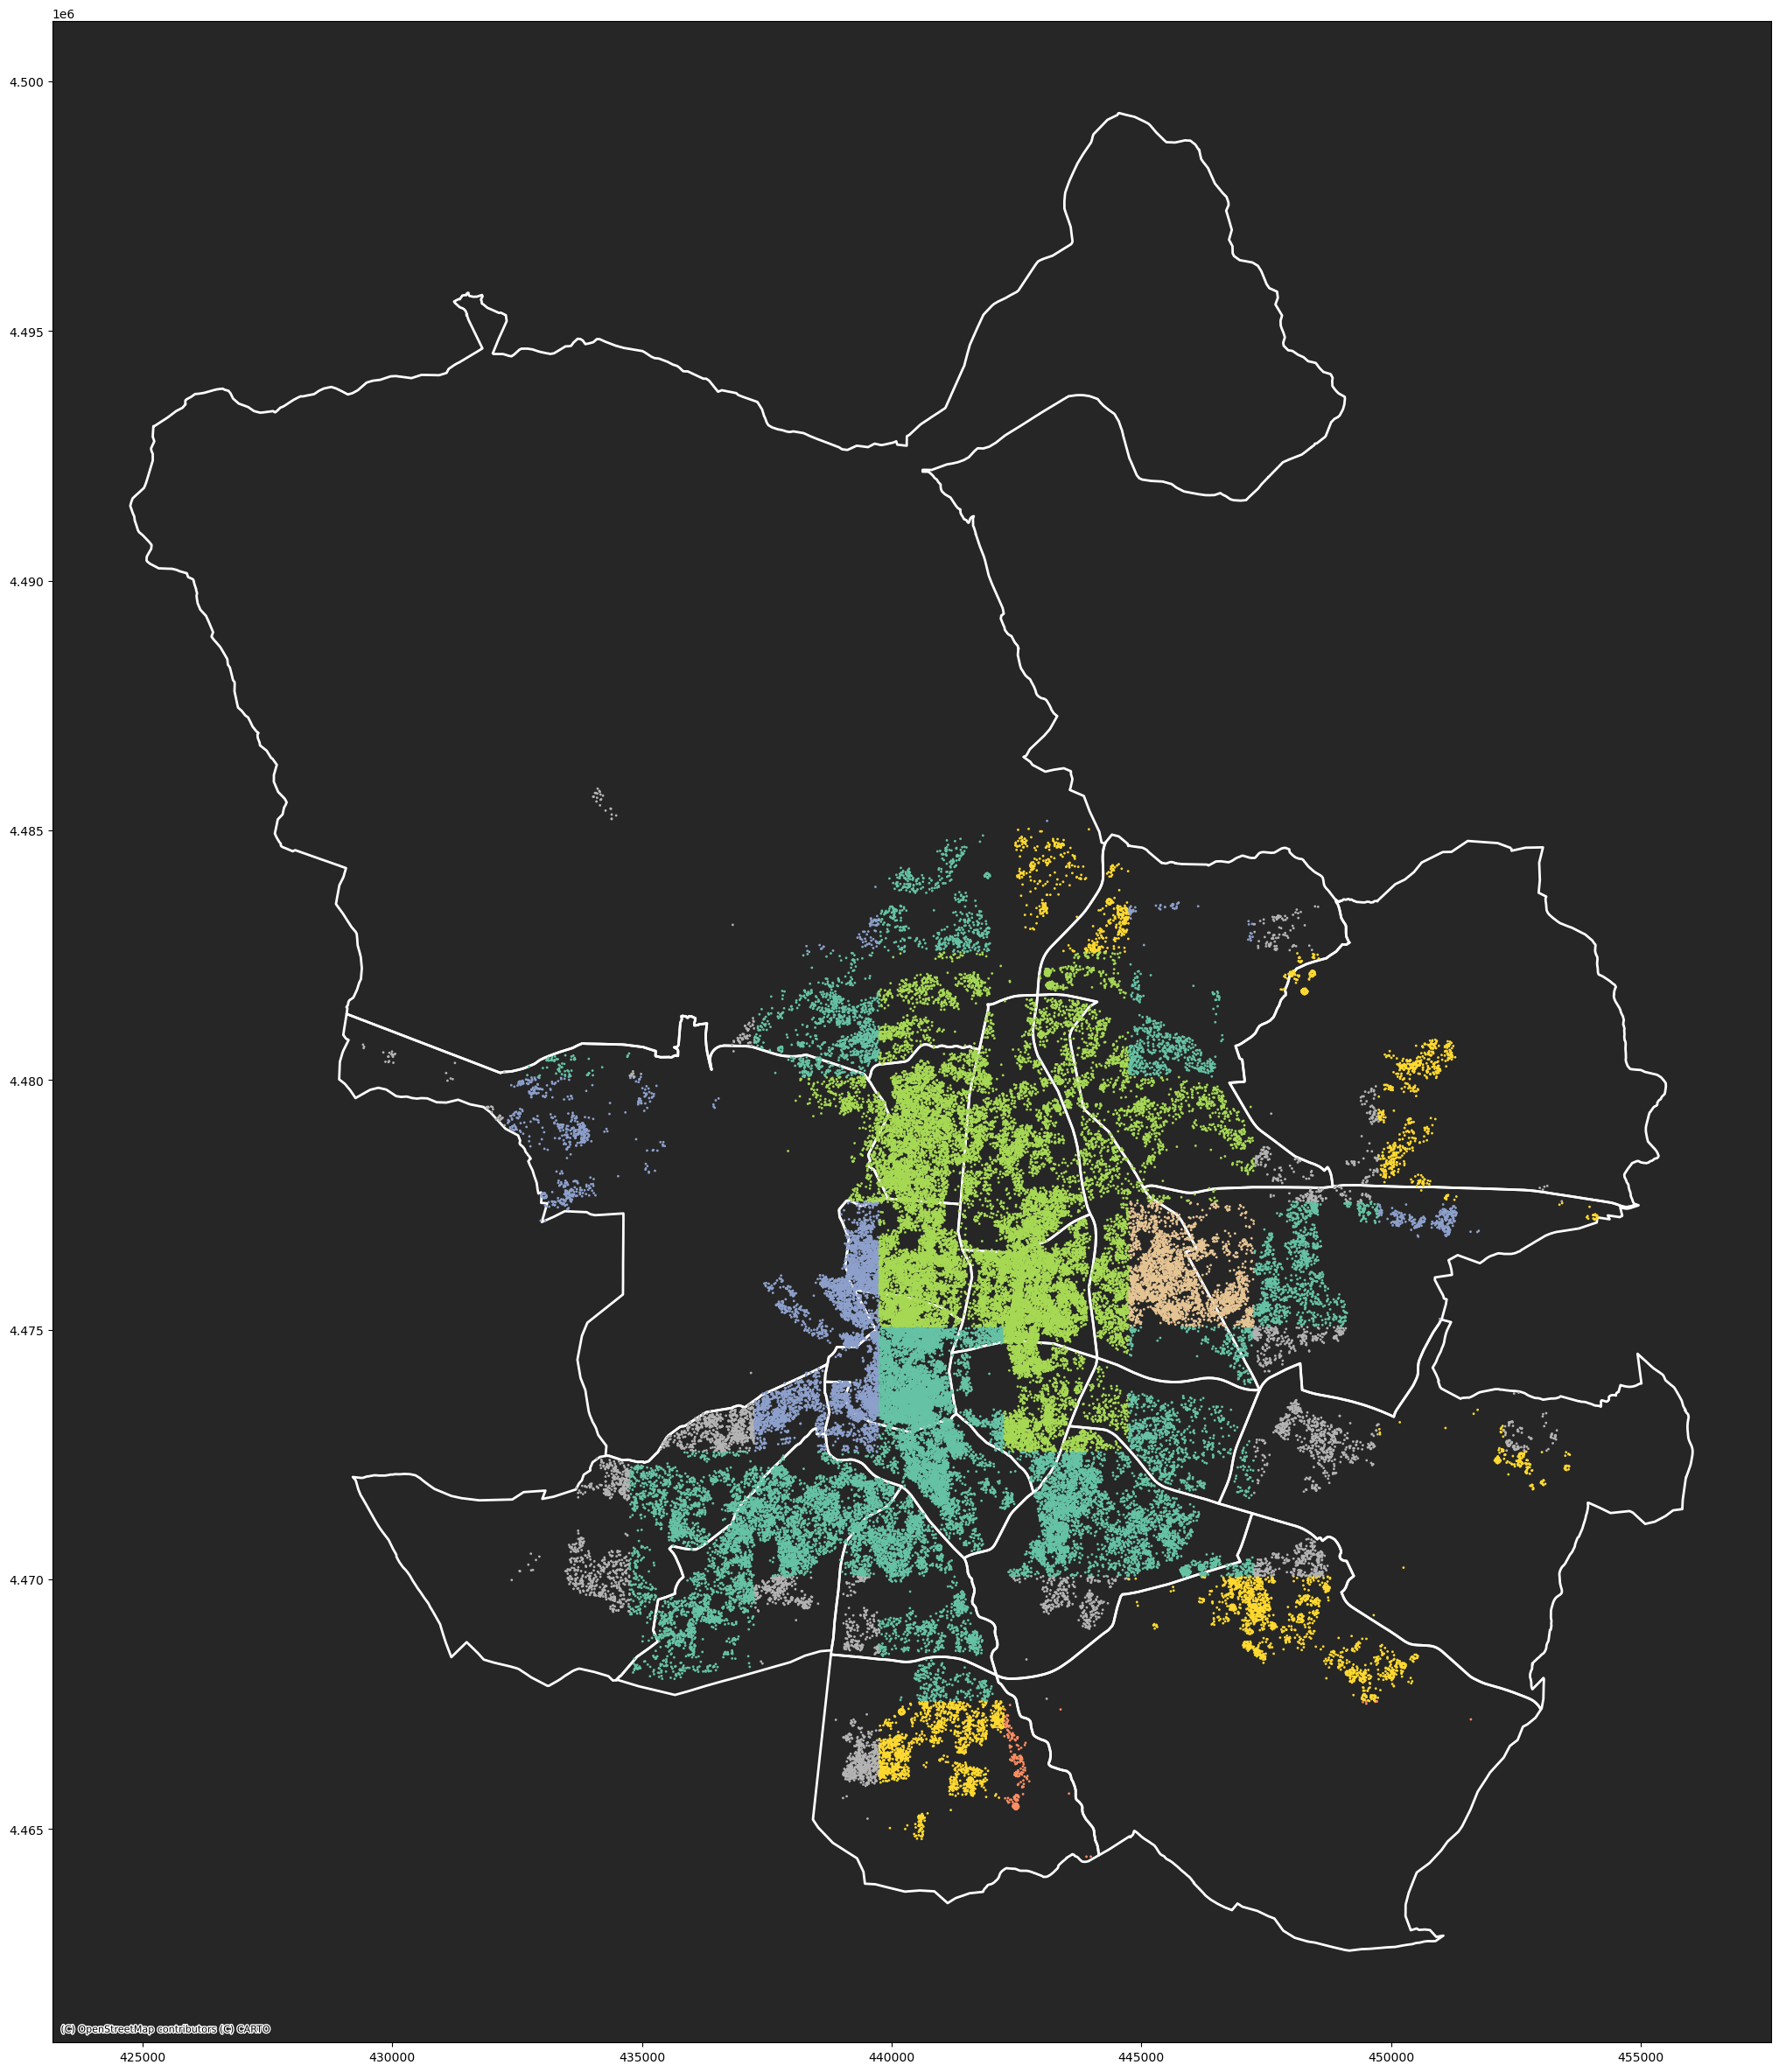

In [52]:
f, axs = plt.subplots(figsize=(30, 30))  # Fix: Pass a tuple to `figsize` parameter
db.plot(ax=axs, facecolor='none', edgecolor='white', linewidth=2)
# Assuming new_dfs_list is a list of GeoDataFrames
transformed_dfs[9].plot('100_10',ax=axs, s=1, cmap='Set2')  # Fix: Access the Axes object using indexing
ctx.add_basemap(ax=axs, zoom=10, source=ctx.providers.CartoDB.DarkMatter)
plt.savefig('map_clus_25_scale9_final.png', dpi=500)